<a href="https://colab.research.google.com/github/dodo0908/Youtube-clone/blob/main/stock_market_analysis_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
#Displaythe data

data = yf.download('ADANIPORTS.NS',start='2023-06-07',end='2024-06-07')
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-07,750.000000,751.000000,741.950012,743.750000,738.783386,2129238
2023-06-08,744.950012,749.000000,733.000000,736.400024,731.482483,2141709
2023-06-09,738.000000,742.000000,733.000000,734.950012,730.042175,1335172
2023-06-12,735.200012,746.549988,733.549988,742.099976,737.144348,4571836
2023-06-13,741.000000,742.400024,735.049988,737.849976,732.922729,3636359


<Axes: xlabel='Date'>

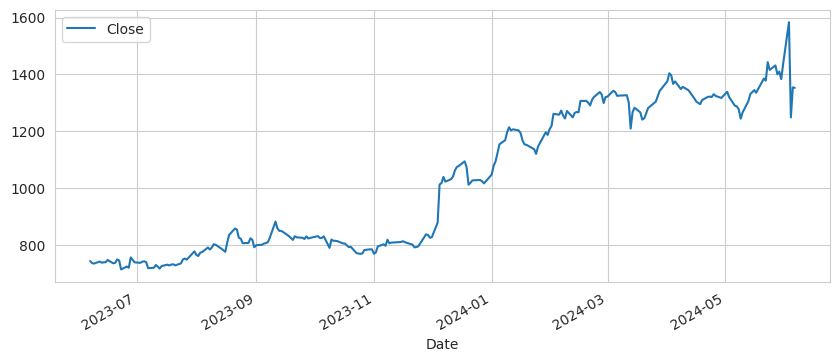

In [ ]:
#Display the close trend

data["Close"].plot(legend = True,figsize = (10,4))

<Axes: xlabel='Date'>

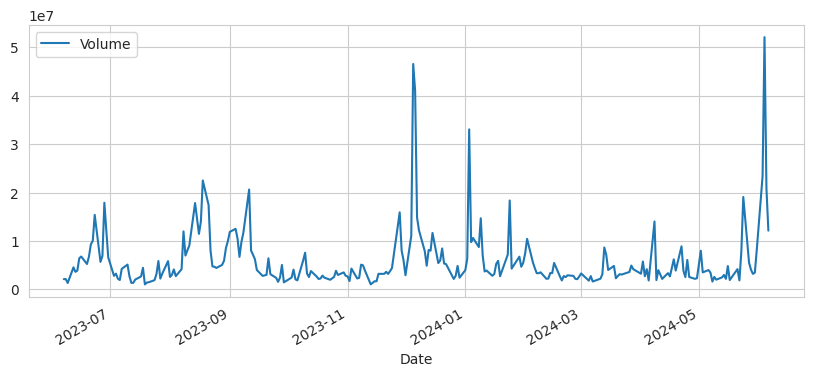

In [ ]:
#Display the volume trend

data["Volume"].plot(legend = True, figsize = (10,4))

In [ ]:
#Create the moving average

data["MA_10"] = data["Close"].rolling(window = 10).mean()
data["MA_50"] = data["Close"].rolling(window = 50).mean()
data["MA_100"] = data["Close"].rolling(window = 100).mean()

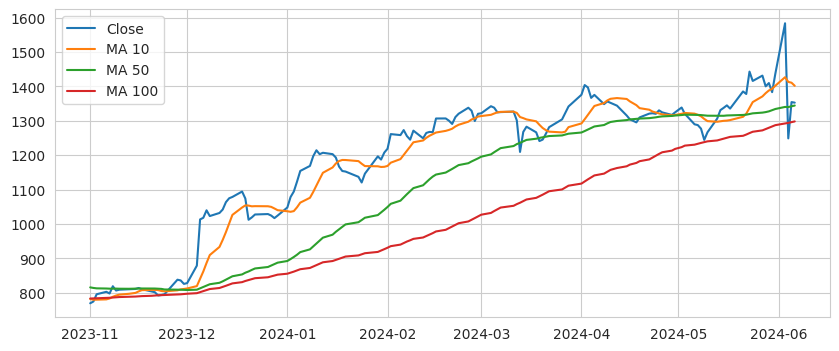

In [ ]:
#Display the Moving average along with the close data.

data = data.iloc[100:]
plt.figure(figsize = (10,4))
plt.plot(data["Close"],label = "Close")
plt.plot(data["MA_10"], label = "MA 10")
plt.plot(data["MA_50"], label = "MA 50")
plt.plot(data["MA_100"], label = "MA 100")
plt.legend()

To learn more about Moving Average please visit this site:

https://how-use-ma-buy-stocks.blogspot.com/2024/06/how-to-use-moving-average-to-buy-stocks.html

In [ ]:
#Calculate the Relative Strength Index(RSI)

diff = data["Close"].diff(1)

gain = diff.where(diff>0,0.0)
loss = -diff.where(diff<0,0.0)

avg_gain = gain.rolling(window = 14, min_periods = 1).mean()
avg_loss = loss.rolling(window = 14, min_periods = 1).mean()

rs = avg_gain / avg_loss
data["rsi"] = 100 - (100 / (1 + rs))


<ipython-input-90-92bd6c3fafc5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["rsi"] = 100 - (100 / (1 + rs))


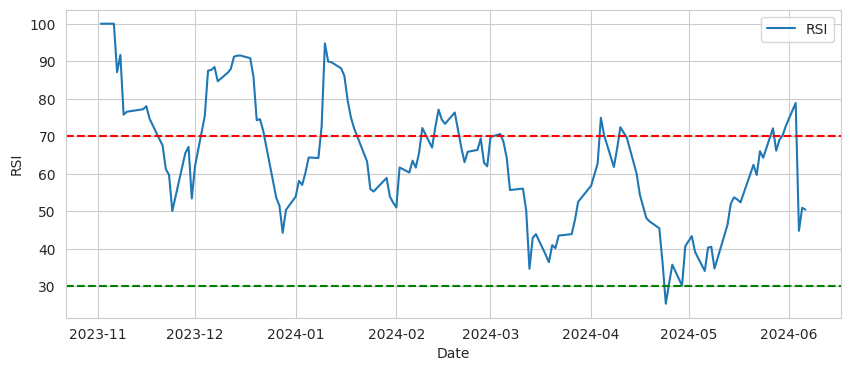

In [ ]:
#Plot the RSI

plt.figure(figsize = (10,4))
plt.plot(data["rsi"], label = "RSI")
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()

To learn more about RSI please visit this site:

https://how-use-ma-buy-stocks.blogspot.com/2024/06/relative-strength-index.html



In [ ]:
#Import all the libraries for the model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [ ]:
#Split the data into test and train

features = data[['Open', 'High', 'Low', 'Volume', 'MA_10', 'MA_50', "MA_100"]]
target = data['Close']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Mean Squared Error = 75.96479634092744


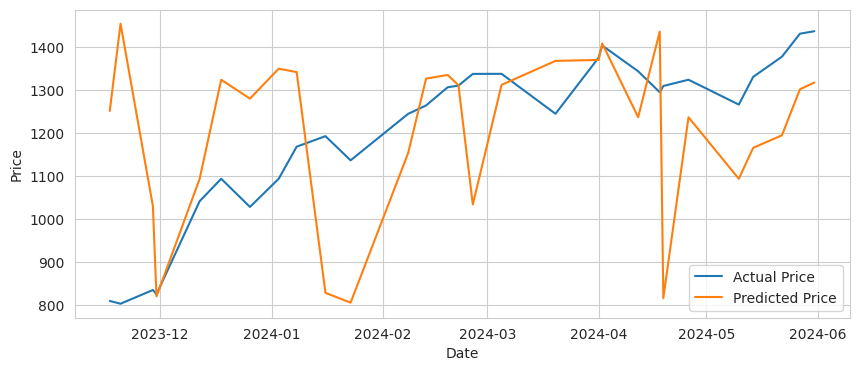

In [ ]:
#Predict using the Linear regression model

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error =", mse)

y_test_sorted = y_test.sort_index()
predictions_sorted = pd.Series(predictions, index=y_test_sorted.index)

plt.figure(figsize=(10,4))
plt.plot(y_test_sorted.index, y_test_sorted, label='Actual Price')
plt.plot(y_test_sorted.index, predictions_sorted, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Mean Squared Error = 209.9572386220969


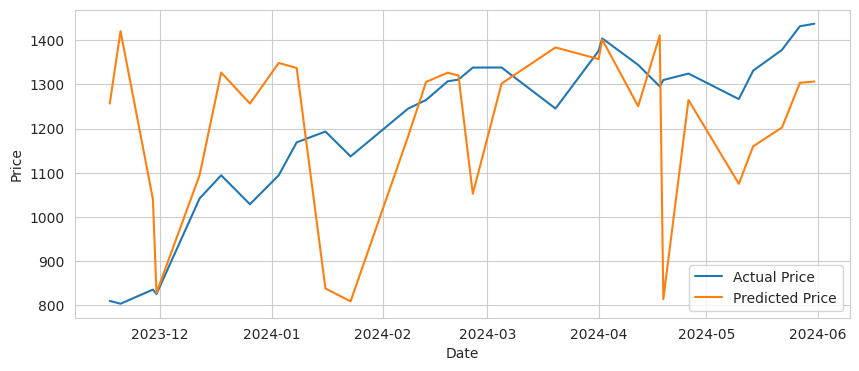

In [ ]:
#Predict using the Random Forest Regressor method

model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)
predictions = model2.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error =", mse)

y_test_sorted = y_test.sort_index()
predictions_sorted = pd.Series(predictions, index=y_test_sorted.index)

plt.figure(figsize=(10,4))
plt.plot(y_test_sorted.index, y_test_sorted, label='Actual Price')
plt.plot(y_test_sorted.index, predictions_sorted, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()